# Introdução aos Sistemas de Controle

----
Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

Os sistemas de controle automáticos têm como objetivo fazer com que um determinado objeto ou dispositivo se comporte de maneira previamente estabelecida, sem que seja necessária a intervenção de algum agente externo.

Incertezas e imprecisões estão sempre presentes no mundo real, deste modo, a maior dificuldade está em desenvolver um mecanismo de controle que, mesmo diante de circunstâncias adversas ou desconhecidas, seja capaz de atuar de maneira satisfatória. 

Um sistema de controle pode ter vários componentes. Para mostrar as funções que são executadas em cada um desses componentes, na engenharia de controle, normalmente utilizamos um diagrama chamado diagrama de blocos.

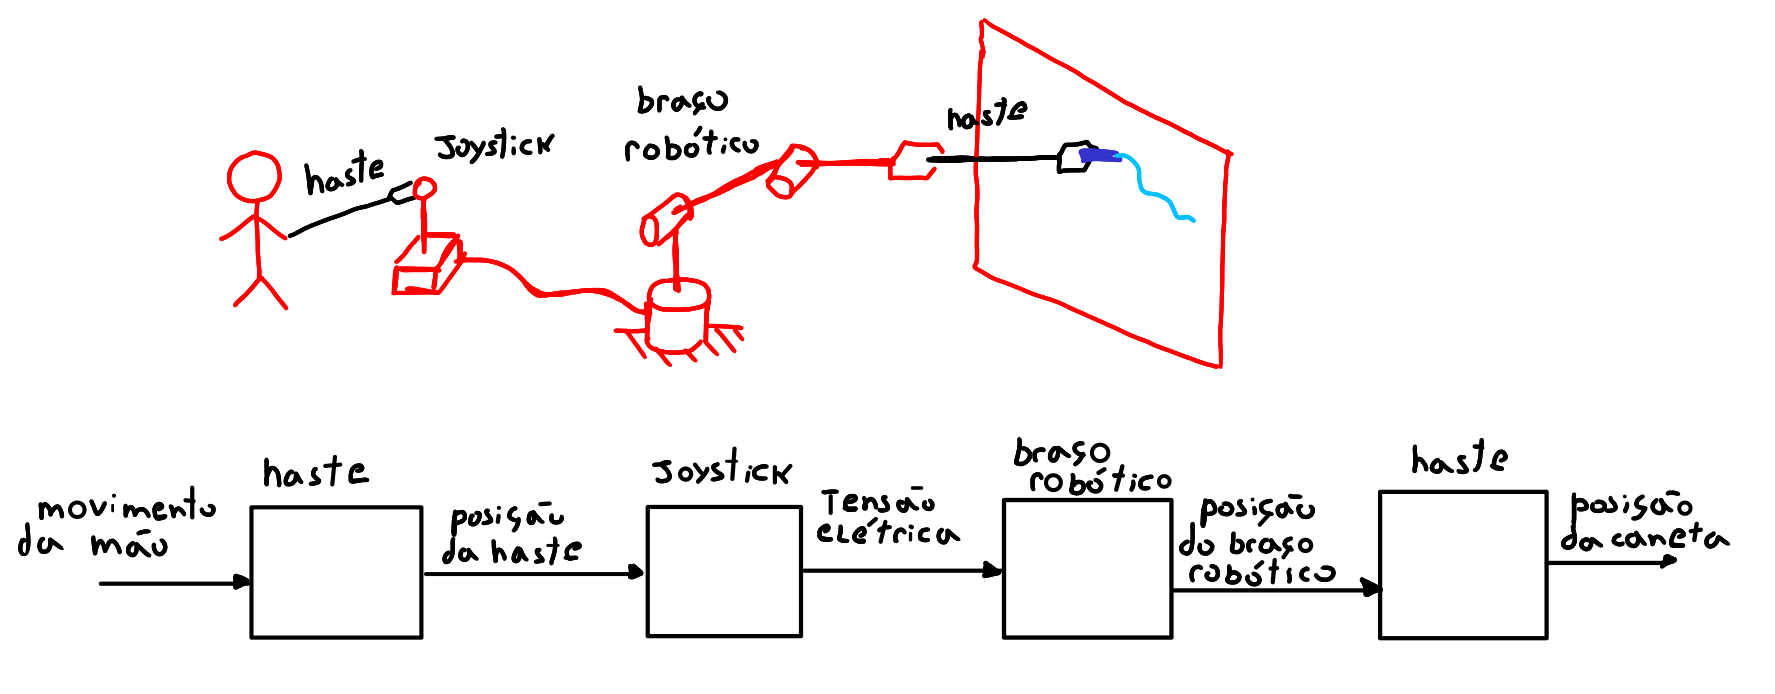

→ Um diagrama de blocos é uma representação gráfica das funções desempenhadas por cada componente e do fluxo de sinais entre eles. 


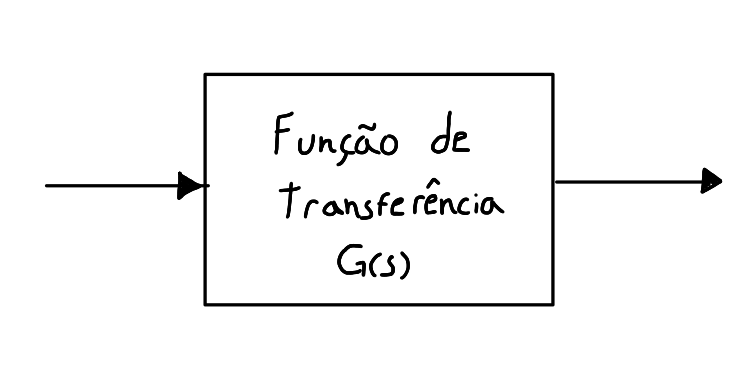

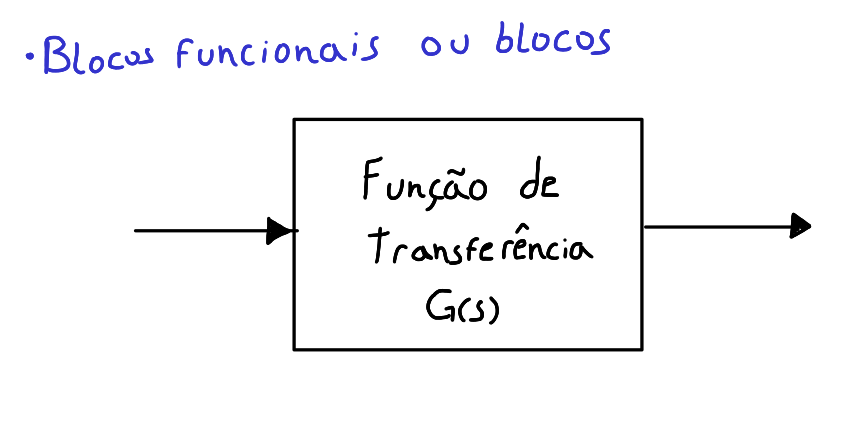

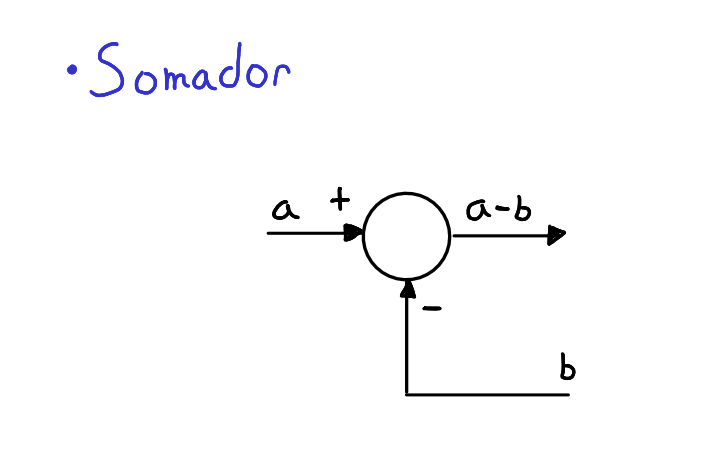

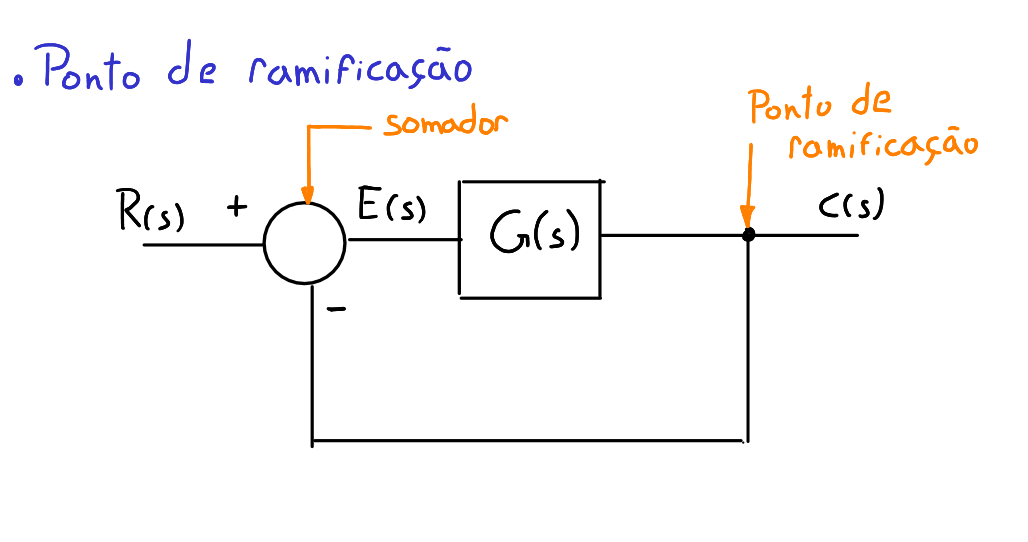

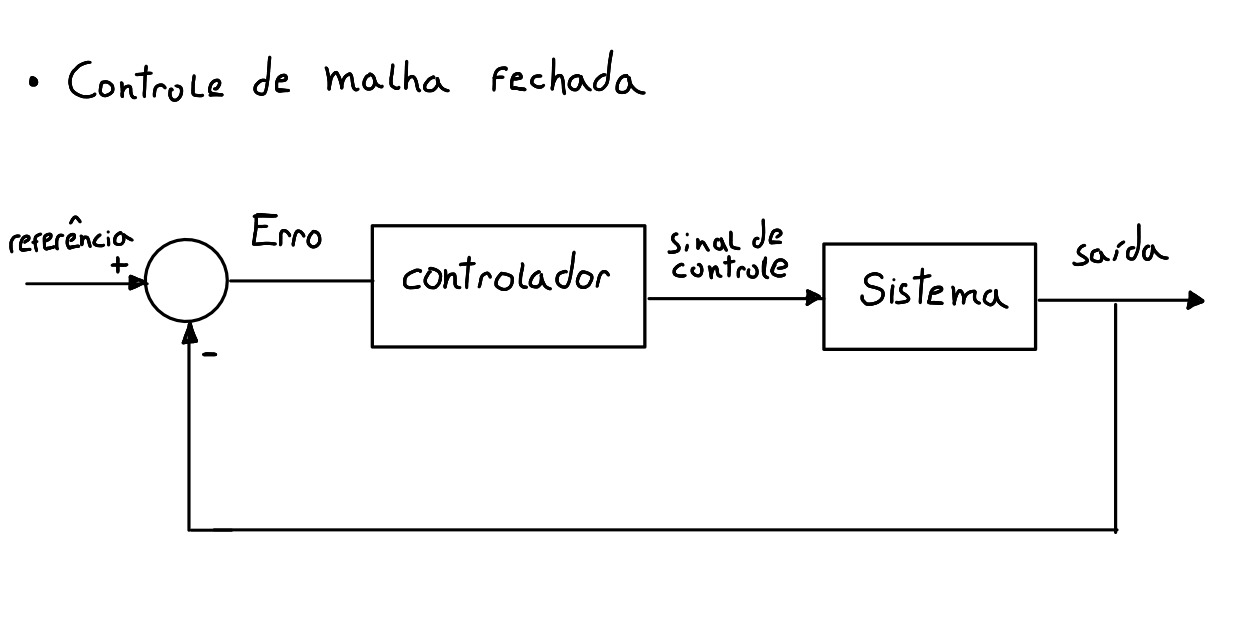

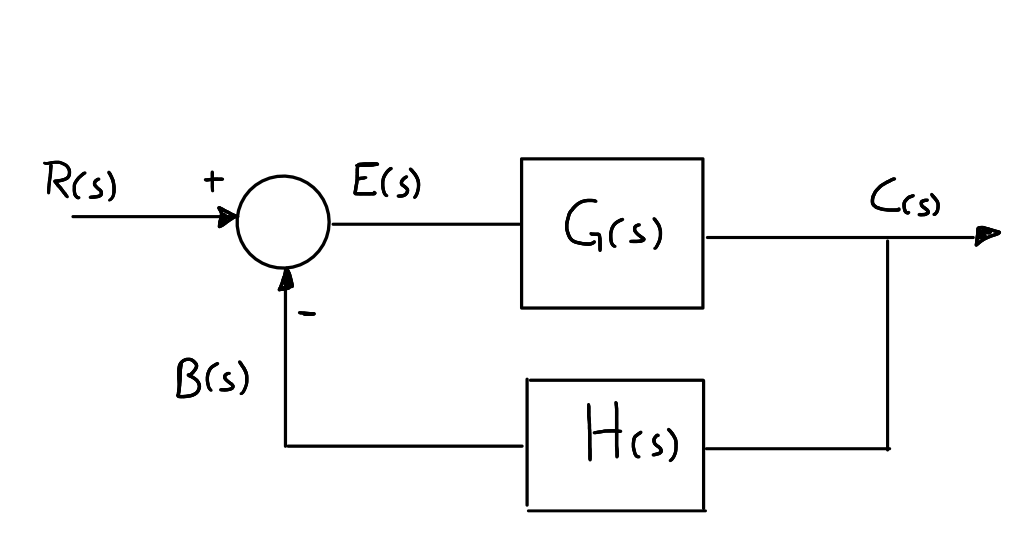

A relação entre o sinal de realimentação $B(s)$ e o sinal de erro atuante $E(s)$ é chamada função de transferência de malha aberta

Função de transferência de malha aberta = $\dfrac{B(s)}{E(s)} = G(s)H(s)$

A relação entre o sinal de saída $C(s)$ e o sinal de erro atuante $E(s)$ é denominado função de transferência do ramo direto

Função de transferência do ramo direto = $\dfrac{C(s)}{E(s)} = G(s)$

**Redução do diagrama de blocos**

→ Sistema em cascata:

![](https://paper-attachments.dropbox.com/s_B7B7589978C0AC41B3D77D7C058BA7A624F97D64CF13504D135CF82FB407646D_1663870988277_image.png)


→ Sistema paralelo

![](https://paper-attachments.dropbox.com/s_B7B7589978C0AC41B3D77D7C058BA7A624F97D64CF13504D135CF82FB407646D_1663871160127_image.png)

→ Sistema com realimentação de malha fechada

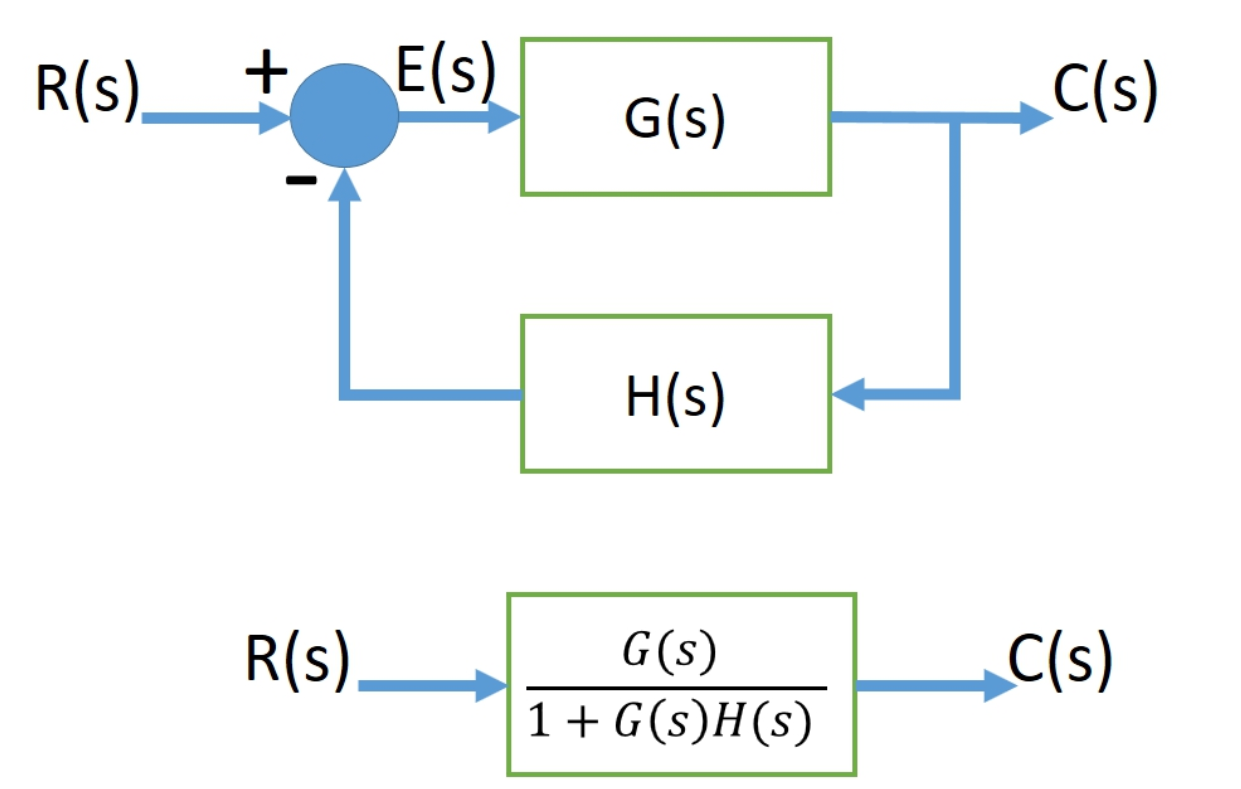


→ Blocos em paralelo

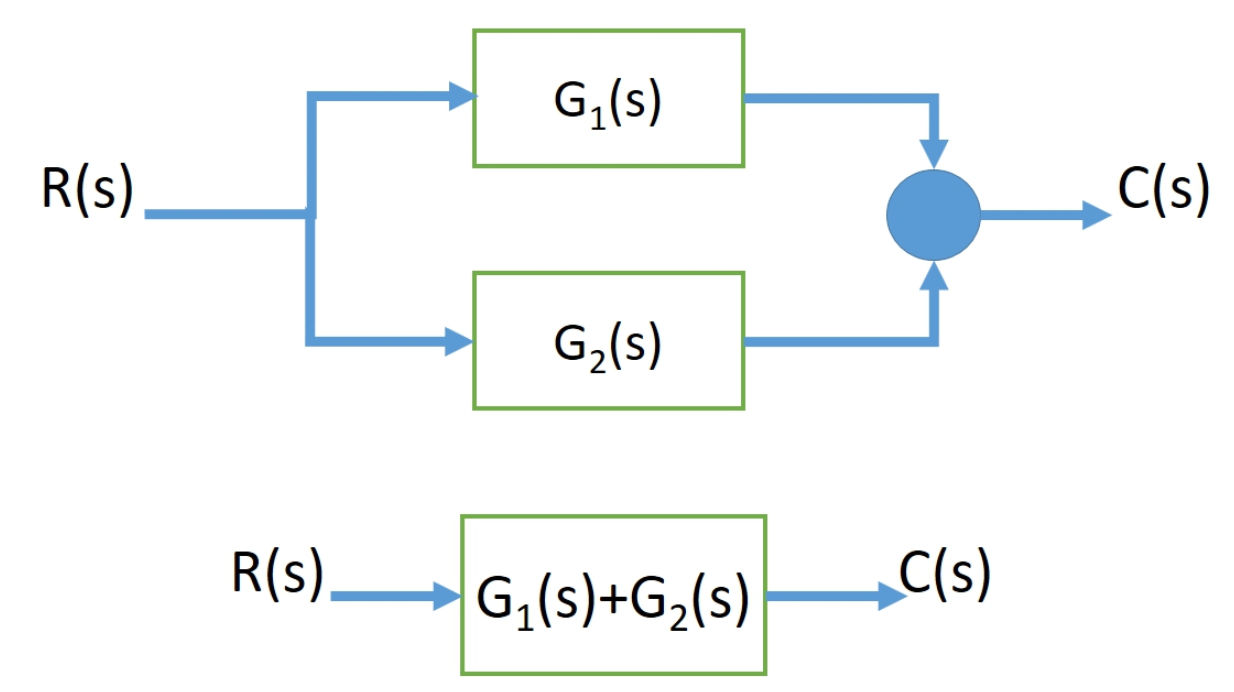

→ Movendo o somador

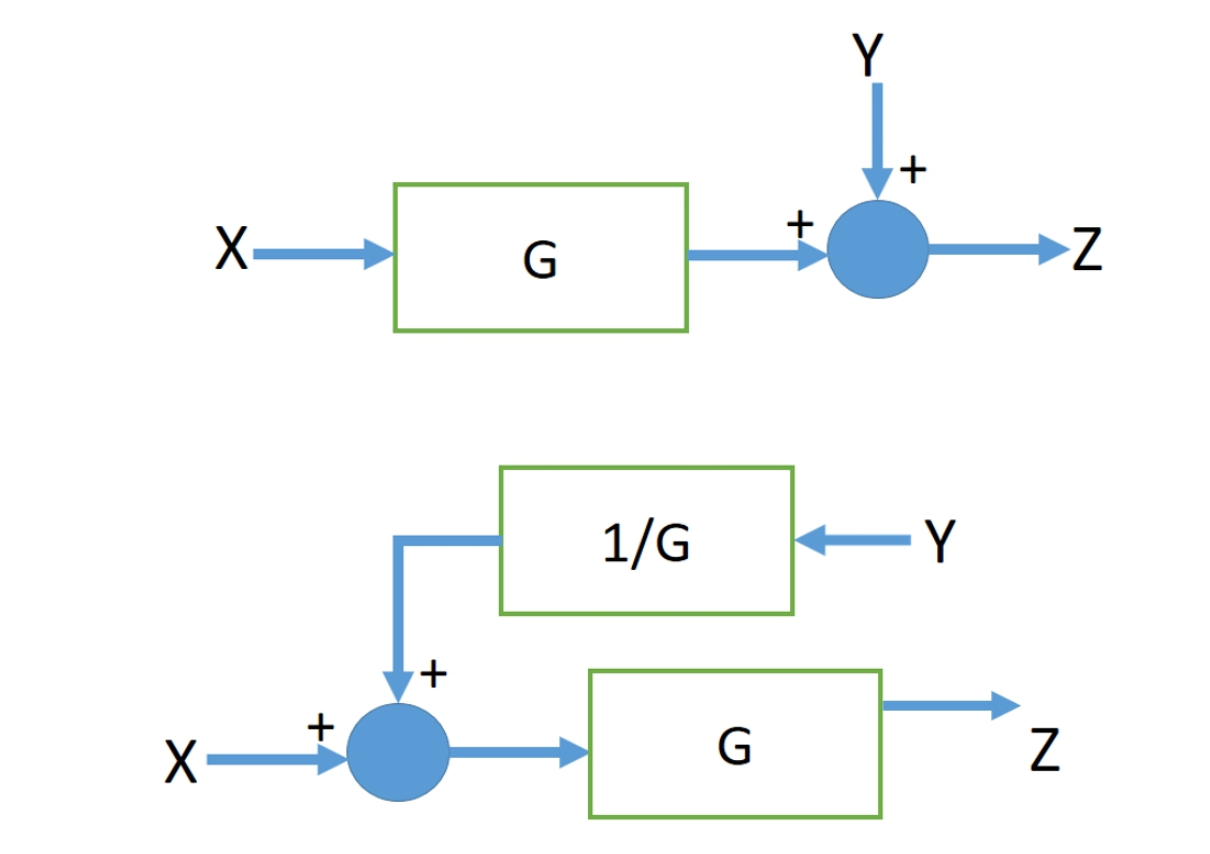



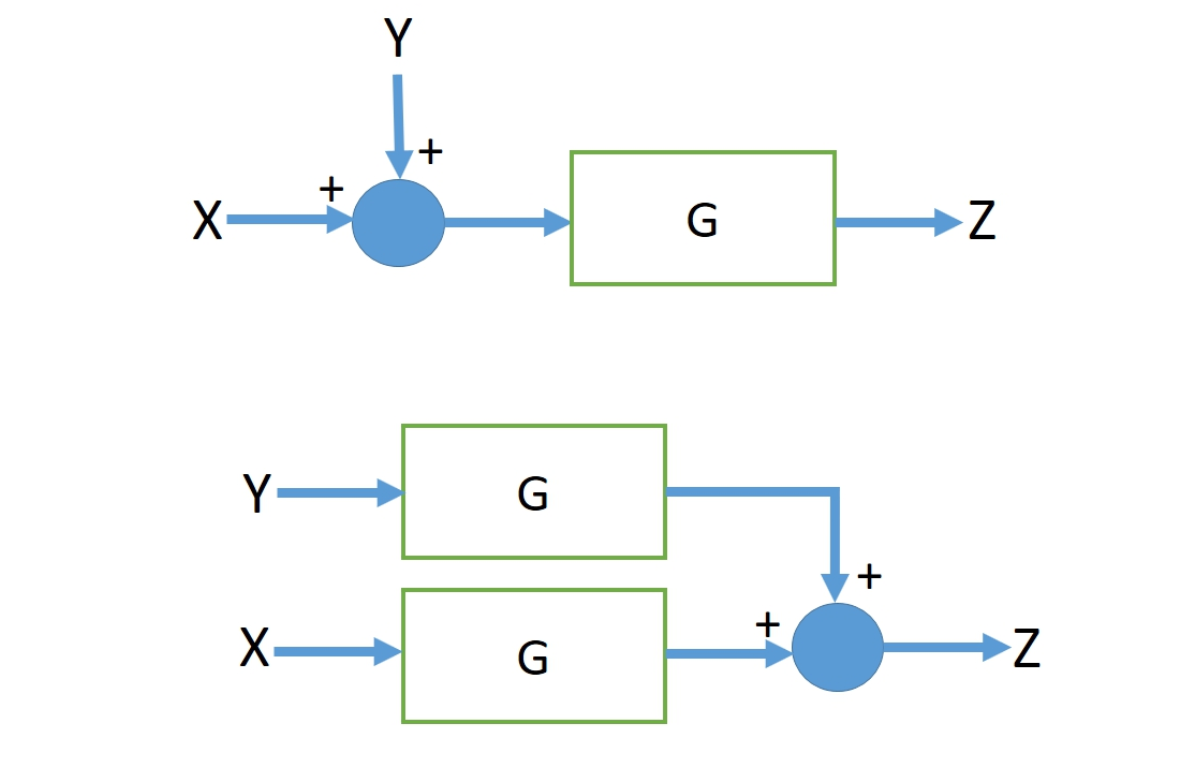

→ Movendo o ponto de ramificação

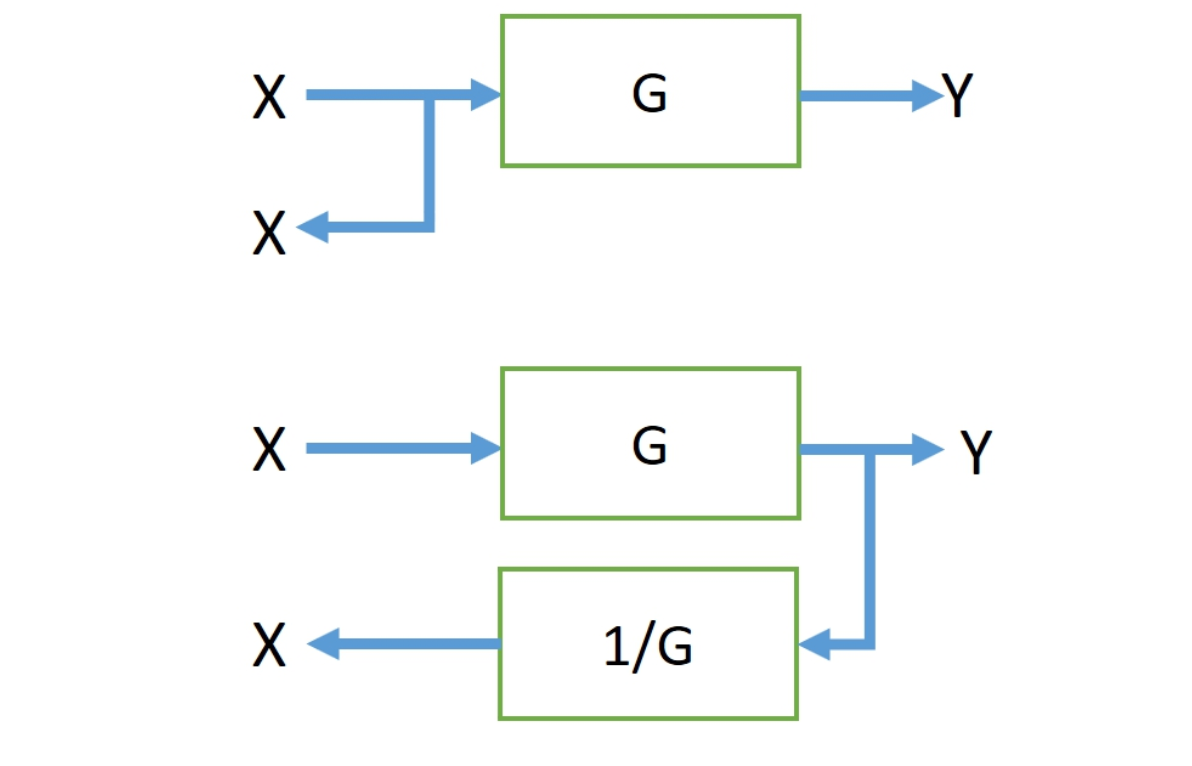

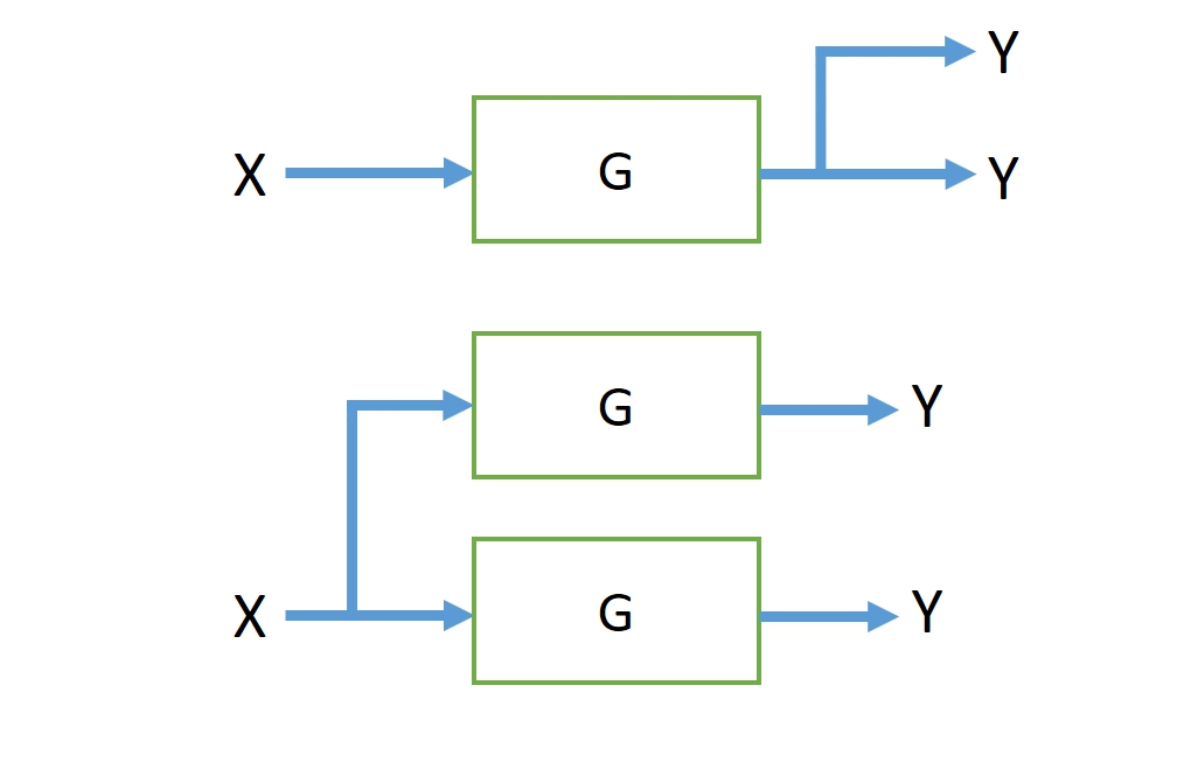

**Exemplo 1:**

Como exemplo, considere o caso que:  
$G_1(s) = \dfrac{10}{s^2 + 2s + 10}$       
e        
$G_2(s) = \dfrac{5}{s+5}$

In [1]:
from control import *

Criando a função de transferência:

In [2]:
num1 = [10]
den1 = [1,2,10]
num2 = [5]
den2 = [1,5]

Função de transferência $G_1(s)$:

In [3]:
G1 = tf(num1,den1)
G1

TransferFunction(array([10]), array([ 1,  2, 10]))

Função de transferência $G_2(s)$:

In [4]:
G2 = tf(num2,den2)
G2

TransferFunction(array([5]), array([1, 5]))

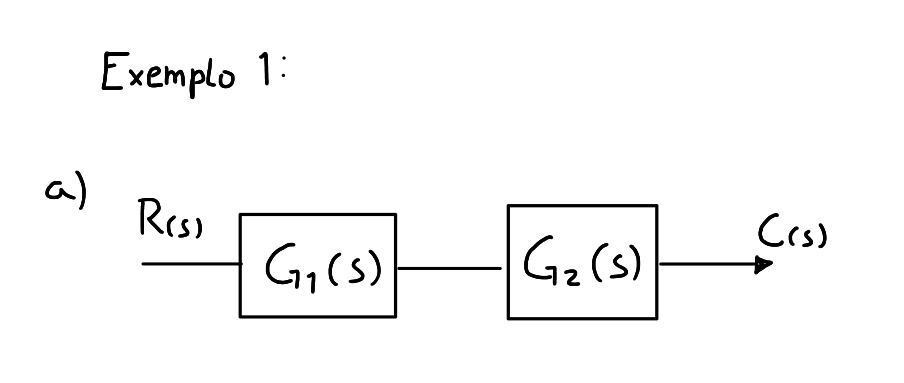

In [5]:
Ga = series(G1,G2)
Ga

TransferFunction(array([50]), array([ 1,  7, 20, 50]))

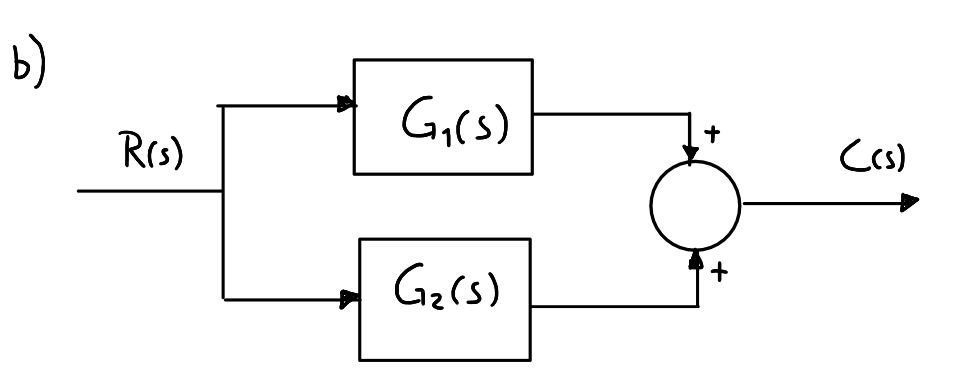

In [6]:
Gb = parallel(G1,G2)
Gb

TransferFunction(array([  5,  20, 100]), array([ 1,  7, 20, 50]))

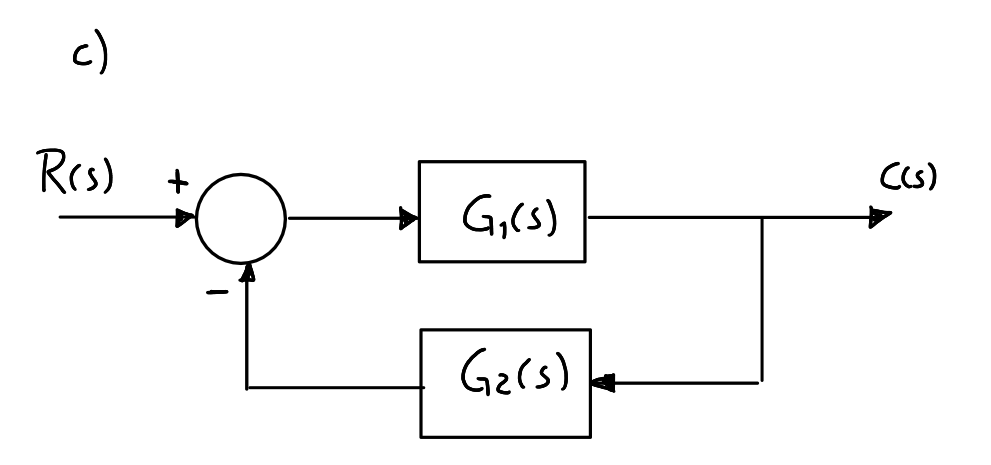

In [7]:
Gc = feedback(G1,G2)
Gc

TransferFunction(array([10, 50]), array([  1,   7,  20, 100]))

## Controladores

1. Controlador on-off (ou relé, ou liga-desliga)
2. Controlador proporcional (P)
3. Controlador proporcional integral (PI)
4. Controlador proporcional derivativo (PID)

**Controlador PID**

* Provavelmente os controladores PID são os mais comumente empregados na indústria.
* Suas aplicações (citando apenas algumas) incluem controle de movimento, controle de sistemas hidráulicos, plantas de processos químicos e guiagem de veículos aeroespaciais. 

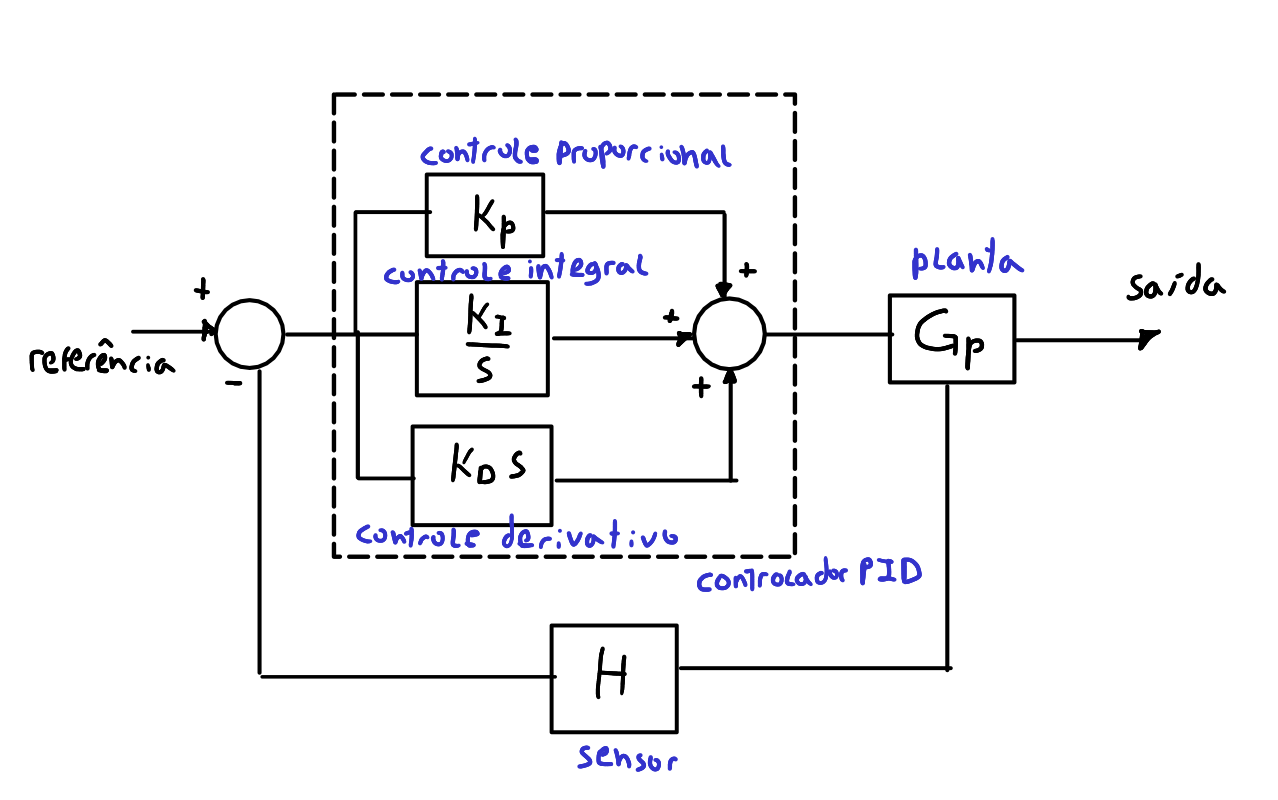

O PID recebe o erro de sinal realimentado $e(t)$ e produz três sinais que são somados para gerar o sinal de controle $u(t)$ de entrada para a planta. 

$u(t) = K_P e(t) +K_I \int e(t) dt + K_D \dot{e}(t)$

$K_P$ é o ganho proporcional

$K_I$ é o ganho integral

$K_D$ é o ganho derivativo

Ajustando cada ganho individual varia a ênfase do controlador PID.

1. O termo proporcional: Aumentar o ganho $K_P$ tende a tornar maior a velocidade de resposta do sistema. O termo do controle proporcional tem um efeito menor conforme o erro de realimentação vai para zero (isto é, bom rastreamento em regime permanente).
2. Termo integral: O sinal de controle é proporcional à soma (integral) de todos os sinais de erro passados e, portanto, o termo de controle integral será não nulo mesmo quando o erro de realimentação tende a zero. Por essa razão, o controle integral é empregado para reduzir o erro de rastreamento em regime permanente. 
3. Termo derivativo: O sinal de controle é proporcional à derivada instantânea do sinal de erro. Assim, o controle derivativo "antecipa" a resposta do sistema porque é baseado na taxa no tempo do sinal de erro. Em geral, aumentar o ganho $K_D$ reduz o sobrevalor e adiciona amortecimento ao sistema de malha fechada. 

Em muitos casos, um subconjunto do controlador PID é empregado. Por exemplo, se um sistema específico possui amortecimento suficiente, pode não ser necessário o termo derivativo do controle e, consequentemente, ajusta-se o ganho $K_D$ em zero. 

Pode-se obter a função de transferência do controlador PID expressando a equação da lógica de controle por meio da variável de Laplace $s$:

$U(s) = K_P E(s) + K_I \dfrac{E(s)}{s} + K_D s E(s)$

$G_C(S) = \dfrac{U(s)}{E(s)} = \dfrac{K_P s + K_I + K_D s^2}{s}$

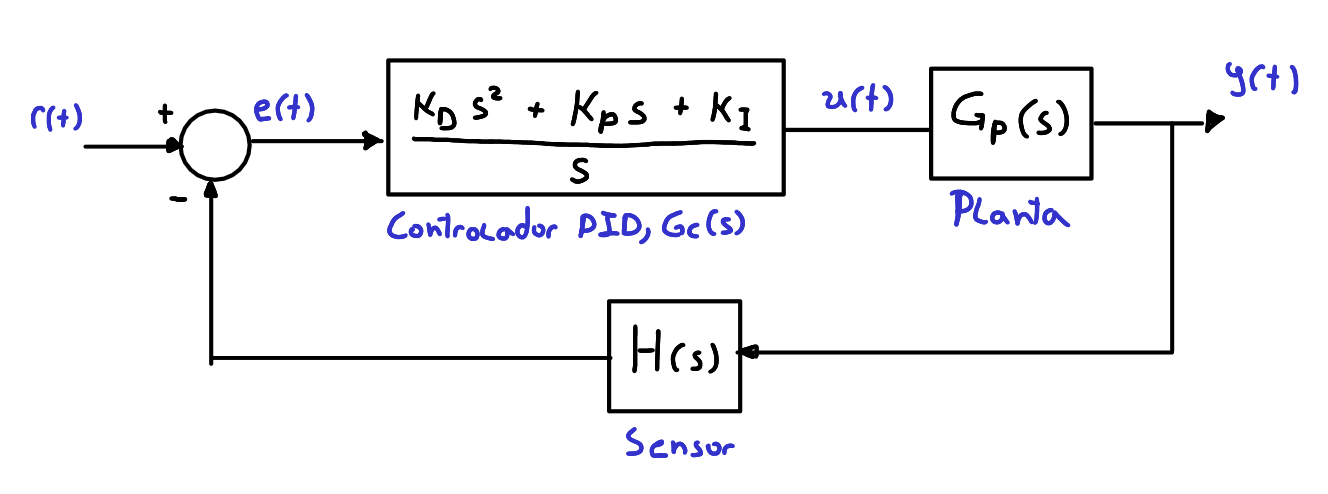

**Exemplo 2:**

A figura a seguir mostra um sistema de malha fechada para controlar a velocidade de um motor CC. Investigue e compare a velocidade de resposta da malha fechada empregando os controladores proporcional e proporcional-integral. 

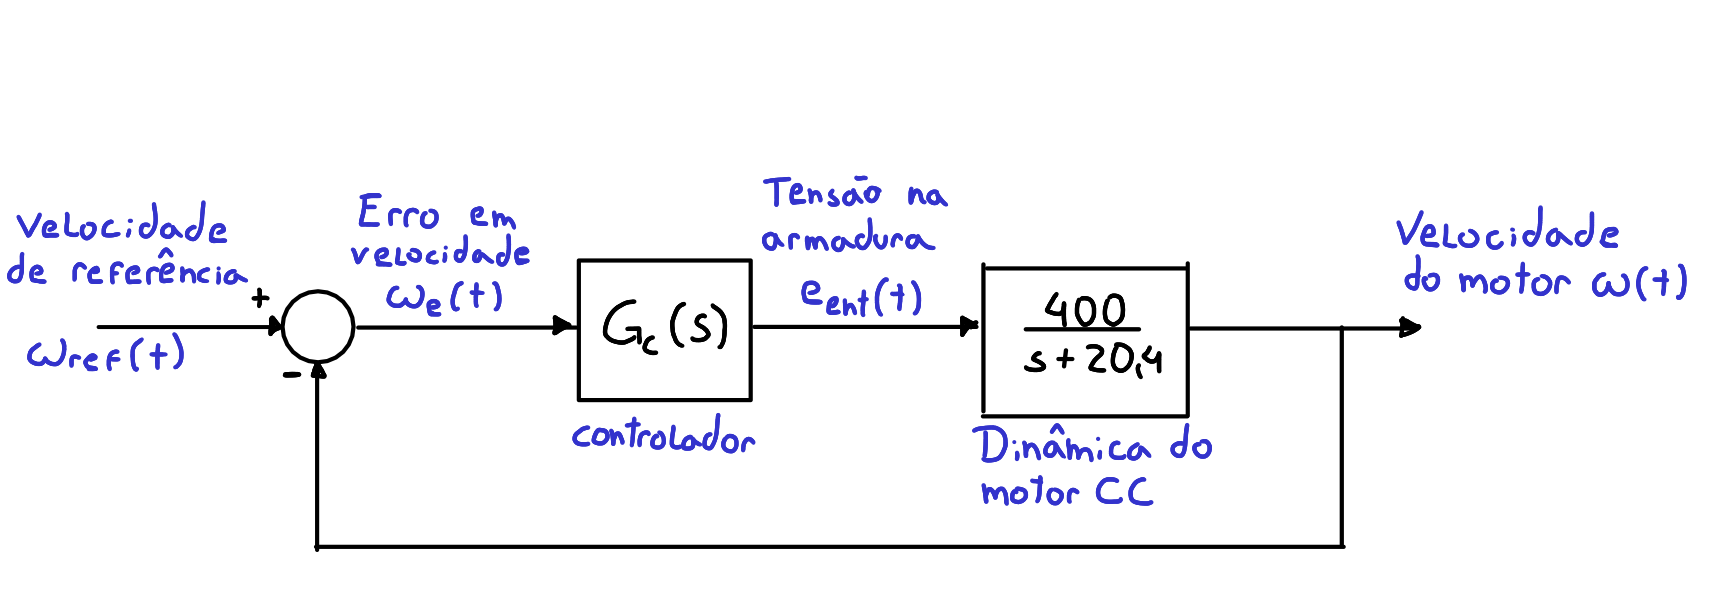

$T(s) = \dfrac{G(s)}{1 + G(s)} = \dfrac{G_C(s)G_P(s)}{1 + G_C(s) G_P(s)}$

In [8]:
from control import *

Controlador Proporcional:

In [9]:
G_P = tf([400],[1,20.4])
G_P

TransferFunction(array([400]), array([ 1. , 20.4]))

In [10]:
# testar com Kp = 1, 0.5, 0.2
G_C_1 = tf([1],[1])
G_C_2 = tf([0.5],[1])
G_C_3 = tf([0.2],[1])

In [11]:
G1 = feedback(series(G_P,G_C_1),1)
G1

TransferFunction(array([400.]), array([  1. , 420.4]))

In [12]:
G2 = feedback(series(G_P,G_C_2),1)
G3 = feedback(series(G_P,G_C_3),1)

In [13]:
import numpy as np

In [14]:
t_n = np.linspace(0,0.08,1000)

In [15]:
u = 50*np.ones(1000)

In [16]:
t1,y1 = forced_response(G1,t_n,u)
t2,y2 = forced_response(G2,t_n,u)
t3,y3 = forced_response(G3,t_n,u)

In [17]:
import matplotlib.pyplot as plt

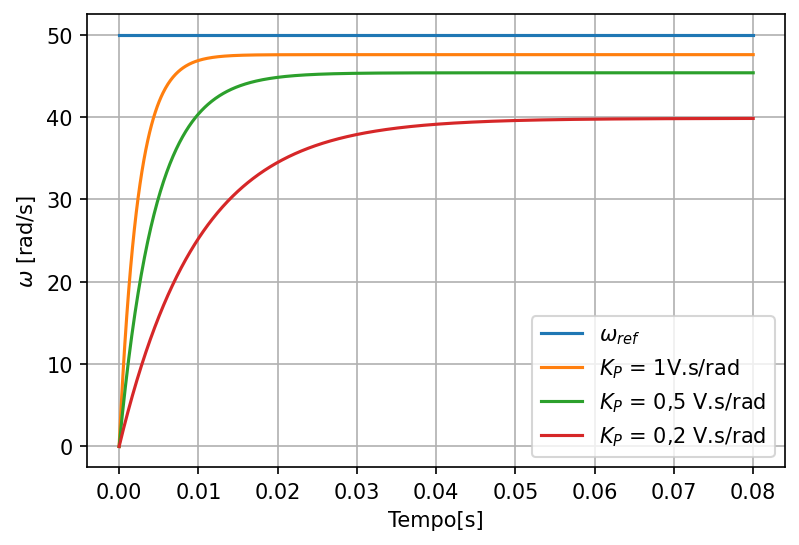

In [18]:
plt.figure(dpi=150)
plt.plot(t_n,u)
plt.plot(t1,y1)
plt.plot(t2,y2)
plt.plot(t3,y3)
plt.xlabel('Tempo[s]')
plt.ylabel(r'$\omega$ [rad/s]')
plt.legend([r'$\omega_{ref}$',r'$K_P$ = 1V.s/rad',r'$K_P$ = 0,5 V.s/rad',r'$K_P$ = 0,2 V.s/rad'])
plt.grid(True)
plt.show()

Controlador PI:

In [19]:
Kp = 1
Ki = 20
G_C_4 = parallel(tf([Ki],[1,0]),tf([Kp],[1]))

Kp = 0.5
Ki = 10
G_C_5 = parallel(tf([Ki],[1,0]),tf([Kp],[1]))

Kp = 0.2
Ki = 4
G_C_6 = parallel(tf([Ki],[1,0]),tf([Kp],[1]))

In [20]:
G4 = feedback(series(G_P,G_C_4),1)
G5 = feedback(series(G_P,G_C_5),1)
G6 = feedback(series(G_P,G_C_6),1)

In [21]:
t4,y4 = forced_response(G4,t_n,u)
t5,y5 = forced_response(G5,t_n,u)
t6,y6 = forced_response(G6,t_n,u)

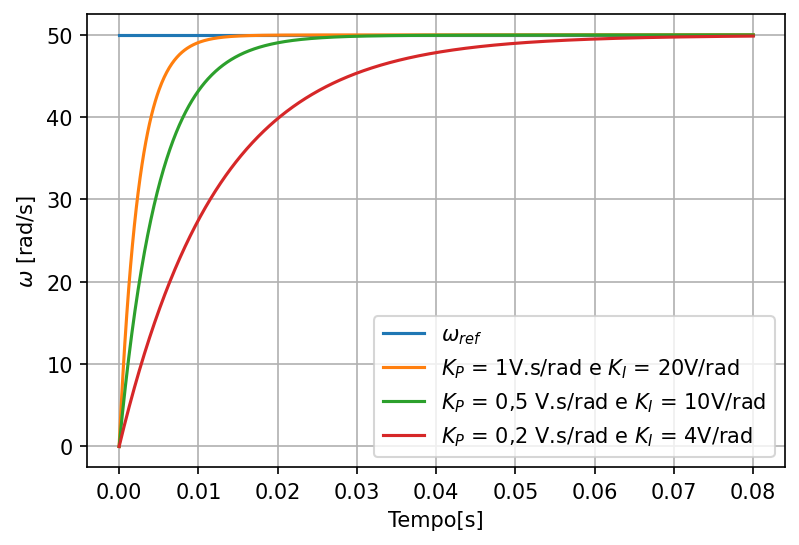

In [22]:
plt.figure(dpi=150)
plt.plot(t_n,u)
plt.plot(t4,y4)
plt.plot(t5,y5)
plt.plot(t6,y6)
plt.xlabel('Tempo[s]')
plt.ylabel(r'$\omega$ [rad/s]')
plt.legend([r'$\omega_{ref}$',r'$K_P$ = 1V.s/rad e $K_I$ = 20V/rad',
            r'$K_P$ = 0,5 V.s/rad e $K_I$ = 10V/rad',r'$K_P$ = 0,2 V.s/rad e $K_I$ = 4V/rad'])
plt.grid(True)
plt.show()